In [94]:
#Importing the libraries
import pandas as pd 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
%matplotlib inline
from sklearn.cluster import KMeans

In [95]:
#Importing the file
d = pd.read_csv("Desktop/CoronaDataUpdate.csv", sep=";",encoding = "ISO-8859-1", engine="python")

In [96]:
#Getting the first 6 rows of data
d.head()

,ï»¿COUNTRY,STATE,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE,POPULATION
0,USA,NaN,309728,8441.0,14741.0,286546,8206.0,33907.0,NaN,"1,029",NaN,1626287.0,NaN,NaN,NaN,NaN,330984275.0
1,Spain,NaN,126168,11947.0,34219.0,80002,6532.0,6969.0,NaN,"0,976",NaN,355000.0,NaN,NaN,NaN,NaN,46753588.0
2,Italy,NaN,124632,15362.0,20996.0,88274,3994.0,4805.0,NaN,"1,047",NaN,657224.0,NaN,NaN,NaN,NaN,60463330.0
3,Germany,NaN,96092,1444.0,26400.0,68248,3936.0,4933.0,NaN,"0,775",NaN,918460.0,NaN,NaN,NaN,NaN,83785805.0
4,France,NaN,89953,7560.0,15438.0,66955,6838.0,25615.0,NaN,"4,894",NaN,224254.0,NaN,NaN,NaN,NaN,65266006.0


In [97]:
#Getting the last 6 rows of data
d.tail()

,ï»¿COUNTRY,STATE,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE,POPULATION
202,Caribbean Netherlands,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,2.624600e+04
203,Falkland Islands,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.479000e+03
204,Papua New Guinea,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,9.000000e+06
205,Timor-Leste,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,China,NaN,81639,3326.0,76755.0,1558,331.0,19.0,NaN,"0,612",NaN,NaN,NaN,NaN,NaN,NaN,1.427647e+09


In [98]:
#Getting the size of the dataset
d.size

3519

In [99]:
d.shape

(207, 17)

In [100]:
#Getting the number of missing values in each column
CoronaData = pd.read_csv("Desktop/CoronaData.csv",encoding = "ISO-8859-1")
null_columns=CoronaData.columns[CoronaData.isnull().any()]
CoronaData[null_columns].isnull().sum()

DATETIME;COUNTRY;STATE;TOTAL_CASES;TOTAL_DEATHS;TOTAL_RECOVERED;ACTIVE_CASES;SERIOUS_CRITICAL;NEW_CASES;NEW_DEATHS;DAILY_GROWTH_FACTOR;DAILY_GROWTH_FACTOR_RATIO;TOTAL_TESTS;TOTAL_CASES_PER_MILLION;DEATHS_PER_MILLION;TESTS_PER_MILLION;FIRST_CASE    81719
dtype: int64

In [101]:
#Checking if there are any missing values
d.isnull().values.any()

True

In [102]:
#Filling missing values with the mean values
d.fillna(d.mean(), inplace=True)
d.head()

,ï»¿COUNTRY,STATE,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE,POPULATION
0,USA,NaN,309728,8441.0,14741.0,286546,8206.0,33907.0,NaN,"1,029",NaN,1626287.0,NaN,NaN,NaN,NaN,330984275.0
1,Spain,NaN,126168,11947.0,34219.0,80002,6532.0,6969.0,NaN,"0,976",NaN,355000.0,NaN,NaN,NaN,NaN,46753588.0
2,Italy,NaN,124632,15362.0,20996.0,88274,3994.0,4805.0,NaN,"1,047",NaN,657224.0,NaN,NaN,NaN,NaN,60463330.0
3,Germany,NaN,96092,1444.0,26400.0,68248,3936.0,4933.0,NaN,"0,775",NaN,918460.0,NaN,NaN,NaN,NaN,83785805.0
4,France,NaN,89953,7560.0,15438.0,66955,6838.0,25615.0,NaN,"4,894",NaN,224254.0,NaN,NaN,NaN,NaN,65266006.0


In [103]:
d =d.drop(['STATE'], axis=1)

In [104]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 16 columns):
ï»¿COUNTRY                   207 non-null object
TOTAL_CASES                  207 non-null int64
TOTAL_DEATHS                 207 non-null float64
TOTAL_RECOVERED              207 non-null float64
ACTIVE_CASES                 207 non-null int64
SERIOUS_CRITICAL             207 non-null float64
NEW_CASES                    207 non-null float64
NEW_DEATHS                   0 non-null float64
DAILY_GROWTH_FACTOR          58 non-null object
DAILY_GROWTH_FACTOR_RATIO    0 non-null float64
TOTAL_TESTS                  207 non-null float64
TOTAL_CASES_PER_MILLION      0 non-null float64
DEATHS_PER_MILLION           0 non-null float64
TESTS_PER_MILLION            0 non-null float64
FIRST_CASE                   0 non-null float64
POPULATION                   207 non-null float64
dtypes: float64(12), int64(2), object(2)
memory usage: 26.0+ KB


In [105]:
#Checking for basic statistic for the column TOTAL_CASES
d["TOTAL_CASES"].describe()

#the output displays the basic statistics for only the column "TOTAL_CASES"

count       207.000000
mean       5793.111111
std       27161.570051
min           1.000000
25%          19.500000
50%         201.000000
75%        1238.000000
max      309728.000000
Name: TOTAL_CASES, dtype: float64

In [106]:
#Detecting outliers
outliers=[]
def detect_outlier(data_1):
    
    threshold=2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [107]:
#Detecting outliers in column TOTAL_CASES
outlier_datapoints = detect_outlier(d["TOTAL_CASES"])
print(outlier_datapoints)

#below displays the outliers in column "TOTAL_CASES"

[309728, 126168, 124632, 96092, 89953, 81639]


In [108]:
#Checking if there are any missing values
d.isnull().values.any()

True

In [109]:
#Filling missing values with the mean values
d.fillna(d.mean(), inplace=True)
d.head()

,ï»¿COUNTRY,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE,POPULATION
0,USA,309728,8441.0,14741.0,286546,8206.0,33907.0,NaN,"1,029",NaN,1626287.0,NaN,NaN,NaN,NaN,330984275.0
1,Spain,126168,11947.0,34219.0,80002,6532.0,6969.0,NaN,"0,976",NaN,355000.0,NaN,NaN,NaN,NaN,46753588.0
2,Italy,124632,15362.0,20996.0,88274,3994.0,4805.0,NaN,"1,047",NaN,657224.0,NaN,NaN,NaN,NaN,60463330.0
3,Germany,96092,1444.0,26400.0,68248,3936.0,4933.0,NaN,"0,775",NaN,918460.0,NaN,NaN,NaN,NaN,83785805.0
4,France,89953,7560.0,15438.0,66955,6838.0,25615.0,NaN,"4,894",NaN,224254.0,NaN,NaN,NaN,NaN,65266006.0


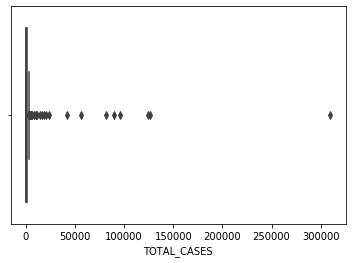

In [110]:
#Detecting outliers with boxplot
import seaborn as sns
sns.boxplot(x=d['TOTAL_CASES'])

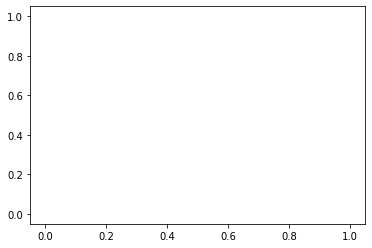

In [111]:
#K-means clustering
plt.scatter(d['TOTAL_DEATHS'], d['TESTS_PER_MILLION'], s = 50, c = 'y') 
plt.show()

In [112]:
#Question 1: there is no relation between total deaths and tests per million since tests per million column is null
#see work below

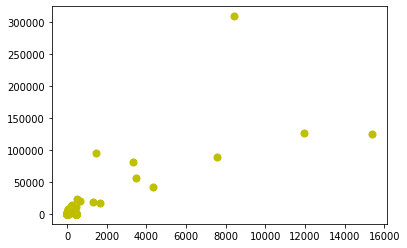

In [113]:
#K-means clustering
plt.scatter(d['TOTAL_DEATHS'], d['TOTAL_CASES'], s = 50, c = 'y') 
plt.show()

In [114]:
#Question 2: this means lower total number of cases will lower the total deaths

In [115]:
d.head()

,ï»¿COUNTRY,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE,POPULATION
0,USA,309728,8441.0,14741.0,286546,8206.0,33907.0,NaN,"1,029",NaN,1626287.0,NaN,NaN,NaN,NaN,330984275.0
1,Spain,126168,11947.0,34219.0,80002,6532.0,6969.0,NaN,"0,976",NaN,355000.0,NaN,NaN,NaN,NaN,46753588.0
2,Italy,124632,15362.0,20996.0,88274,3994.0,4805.0,NaN,"1,047",NaN,657224.0,NaN,NaN,NaN,NaN,60463330.0
3,Germany,96092,1444.0,26400.0,68248,3936.0,4933.0,NaN,"0,775",NaN,918460.0,NaN,NaN,NaN,NaN,83785805.0
4,France,89953,7560.0,15438.0,66955,6838.0,25615.0,NaN,"4,894",NaN,224254.0,NaN,NaN,NaN,NaN,65266006.0


In [116]:
d =d.drop(['ï»¿COUNTRY','DAILY_GROWTH_FACTOR','DAILY_GROWTH_FACTOR_RATIO','NEW_DEATHS','TOTAL_CASES_PER_MILLION','DEATHS_PER_MILLION', 'TESTS_PER_MILLION','FIRST_CASE'], axis=1)

#dropping all null columns

In [117]:
d.head()

,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,TOTAL_TESTS,POPULATION
0,309728,8441.0,14741.0,286546,8206.0,33907.0,1626287.0,330984275.0
1,126168,11947.0,34219.0,80002,6532.0,6969.0,355000.0,46753588.0
2,124632,15362.0,20996.0,88274,3994.0,4805.0,657224.0,60463330.0
3,96092,1444.0,26400.0,68248,3936.0,4933.0,918460.0,83785805.0
4,89953,7560.0,15438.0,66955,6838.0,25615.0,224254.0,65266006.0


In [118]:
#Normalizing the data
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

(150, 4)


In [119]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(d)
data_transformed = mms.transform(d)

In [120]:
#K means with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(d)
kmeans.cluster_centers_

array([[5.43635610e+03, 4.21556359e+02, 1.14017377e+03, 4.31226341e+03,
        3.61893558e+02, 1.75792229e+03, 6.26331331e+04, 3.40626440e+07],
       [4.23605000e+04, 1.70600000e+03, 3.84920000e+04, 2.16250000e+03,
        3.46371795e+02, 2.67000000e+02, 8.97515735e+04, 1.40487722e+09]])

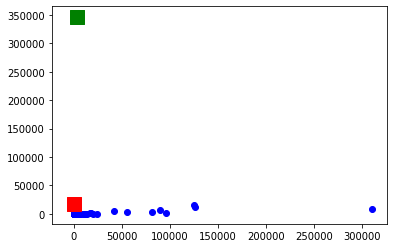

In [121]:
plt.scatter(d['TOTAL_CASES'], d['TOTAL_DEATHS'], c = 'b')
plt.scatter(3.27089163e+03 , 3.46871400e+05, s=200, c='g', marker='s')
plt.scatter(4.40273432e+02, 1.79902000e+04, s=200, c='r', marker='s')
plt.show()

In [122]:
#Checking for basic statistic for the column TOTAL_DEATHS
d["TOTAL_DEATHS"].describe()

count      207.000000
mean       433.966443
std       1601.850866
min          1.000000
25%          4.000000
50%         32.000000
75%        433.966443
max      15362.000000
Name: TOTAL_DEATHS, dtype: float64

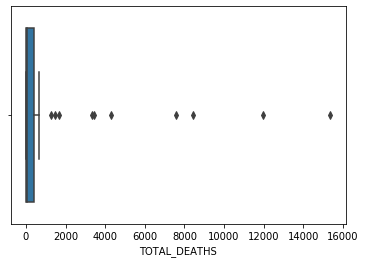

In [123]:
sns.boxplot(x=d['TOTAL_DEATHS'])

In [124]:
#Question 3: average number of deaths is 433.

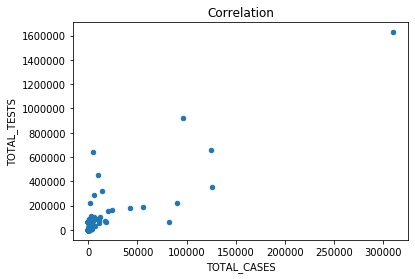

In [125]:
d.plot.scatter(x='TOTAL_CASES', y='TOTAL_TESTS', title='Correlation')

In [126]:
#Question 4: positive relationship between total number of cases and total number of tests

In [127]:
#Fatality Rate
d['FATALITY_RATE'] = d['TOTAL_DEATHS']/d['TOTAL_CASES']
d

,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,TOTAL_TESTS,POPULATION,FATALITY_RATE
0,309728,8441.000000,14741.000000,286546,8206.00000,33907.000000,1.626287e+06,3.309843e+08,0.027253
1,126168,11947.000000,34219.000000,80002,6532.00000,6969.000000,3.550000e+05,4.675359e+07,0.094691
2,124632,15362.000000,20996.000000,88274,3994.00000,4805.000000,6.572240e+05,6.046333e+07,0.123259
3,96092,1444.000000,26400.000000,68248,3936.00000,4933.000000,9.184600e+05,8.378580e+07,0.015027
4,89953,7560.000000,15438.000000,66955,6838.00000,25615.000000,2.242540e+05,6.526601e+07,0.084044
...,...,...,...,...,...,...,...,...,...
202,2,433.966443,1501.060976,2,361.74359,1743.517241,1.000000e+01,2.624600e+04,216.983221
203,1,433.966443,1501.060976,1,361.74359,1743.517241,6.289515e+04,3.479000e+03,433.966443
204,1,433.966443,1501.060976,1,361.74359,1743.517241,7.200000e+01,9.000000e+06,433.966443
205,1,433.966443,1501.060976,1,361.74359,1743.517241,6.289515e+04,4.730723e+07,433.966443


In [128]:
#Tests per million
d['TESTS_PER_MILLION'] = d['TOTAL_TESTS']/d['POPULATION']
d

,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,TOTAL_TESTS,POPULATION,FATALITY_RATE,TESTS_PER_MILLION
0,309728,8441.000000,14741.000000,286546,8206.00000,33907.000000,1.626287e+06,3.309843e+08,0.027253,0.004913
1,126168,11947.000000,34219.000000,80002,6532.00000,6969.000000,3.550000e+05,4.675359e+07,0.094691,0.007593
2,124632,15362.000000,20996.000000,88274,3994.00000,4805.000000,6.572240e+05,6.046333e+07,0.123259,0.010870
3,96092,1444.000000,26400.000000,68248,3936.00000,4933.000000,9.184600e+05,8.378580e+07,0.015027,0.010962
4,89953,7560.000000,15438.000000,66955,6838.00000,25615.000000,2.242540e+05,6.526601e+07,0.084044,0.003436
...,...,...,...,...,...,...,...,...,...,...
202,2,433.966443,1501.060976,2,361.74359,1743.517241,1.000000e+01,2.624600e+04,216.983221,0.000381
203,1,433.966443,1501.060976,1,361.74359,1743.517241,6.289515e+04,3.479000e+03,433.966443,18.078513
204,1,433.966443,1501.060976,1,361.74359,1743.517241,7.200000e+01,9.000000e+06,433.966443,0.000008
205,1,433.966443,1501.060976,1,361.74359,1743.517241,6.289515e+04,4.730723e+07,433.966443,0.001330


In [129]:
d['log_value1'] = np.log(d['FATALITY_RATE'])
print(d) 

     TOTAL_CASES  TOTAL_DEATHS  TOTAL_RECOVERED  ACTIVE_CASES  \
0         309728   8441.000000     14741.000000        286546   
1         126168  11947.000000     34219.000000         80002   
2         124632  15362.000000     20996.000000         88274   
3          96092   1444.000000     26400.000000         68248   
4          89953   7560.000000     15438.000000         66955   
..           ...           ...              ...           ...   
202            2    433.966443      1501.060976             2   
203            1    433.966443      1501.060976             1   
204            1    433.966443      1501.060976             1   
205            1    433.966443      1501.060976             1   
206        81639   3326.000000     76755.000000          1558   

     SERIOUS_CRITICAL     NEW_CASES   TOTAL_TESTS    POPULATION  \
0          8206.00000  33907.000000  1.626287e+06  3.309843e+08   
1          6532.00000   6969.000000  3.550000e+05  4.675359e+07   
2          3994.00

In [130]:
d.head()

,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,TOTAL_TESTS,POPULATION,FATALITY_RATE,TESTS_PER_MILLION,log_value1
0,309728,8441.0,14741.0,286546,8206.0,33907.0,1626287.0,330984275.0,0.027253,0.004913,-3.602594
1,126168,11947.0,34219.0,80002,6532.0,6969.0,355000.0,46753588.0,0.094691,0.007593,-2.357134
2,124632,15362.0,20996.0,88274,3994.0,4805.0,657224.0,60463330.0,0.123259,0.010870,-2.093468
3,96092,1444.0,26400.0,68248,3936.0,4933.0,918460.0,83785805.0,0.015027,0.010962,-4.197889
4,89953,7560.0,15438.0,66955,6838.0,25615.0,224254.0,65266006.0,0.084044,0.003436,-2.476416


In [131]:
d['log_value2'] = np.log(d['TESTS_PER_MILLION'])
print(d) 

     TOTAL_CASES  TOTAL_DEATHS  TOTAL_RECOVERED  ACTIVE_CASES  \
0         309728   8441.000000     14741.000000        286546   
1         126168  11947.000000     34219.000000         80002   
2         124632  15362.000000     20996.000000         88274   
3          96092   1444.000000     26400.000000         68248   
4          89953   7560.000000     15438.000000         66955   
..           ...           ...              ...           ...   
202            2    433.966443      1501.060976             2   
203            1    433.966443      1501.060976             1   
204            1    433.966443      1501.060976             1   
205            1    433.966443      1501.060976             1   
206        81639   3326.000000     76755.000000          1558   

     SERIOUS_CRITICAL     NEW_CASES   TOTAL_TESTS    POPULATION  \
0          8206.00000  33907.000000  1.626287e+06  3.309843e+08   
1          6532.00000   6969.000000  3.550000e+05  4.675359e+07   
2          3994.00

In [132]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(d['FATALITY_RATE'].values.reshape(-1,1), d['TESTS_PER_MILLION'])

x= d['FATALITY_RATE']
y= d['TESTS_PER_MILLION']

new_x = 80 

new_y = x*lr.coef_[0]+lr.intercept_
print(new_y)

0     -0.039082
1     -0.038294
2     -0.037961
3     -0.039224
4     -0.038419
         ...   
202    2.493559
203    5.026518
204    5.026518
205    5.026518
206   -0.038924
Name: FATALITY_RATE, Length: 207, dtype: float64


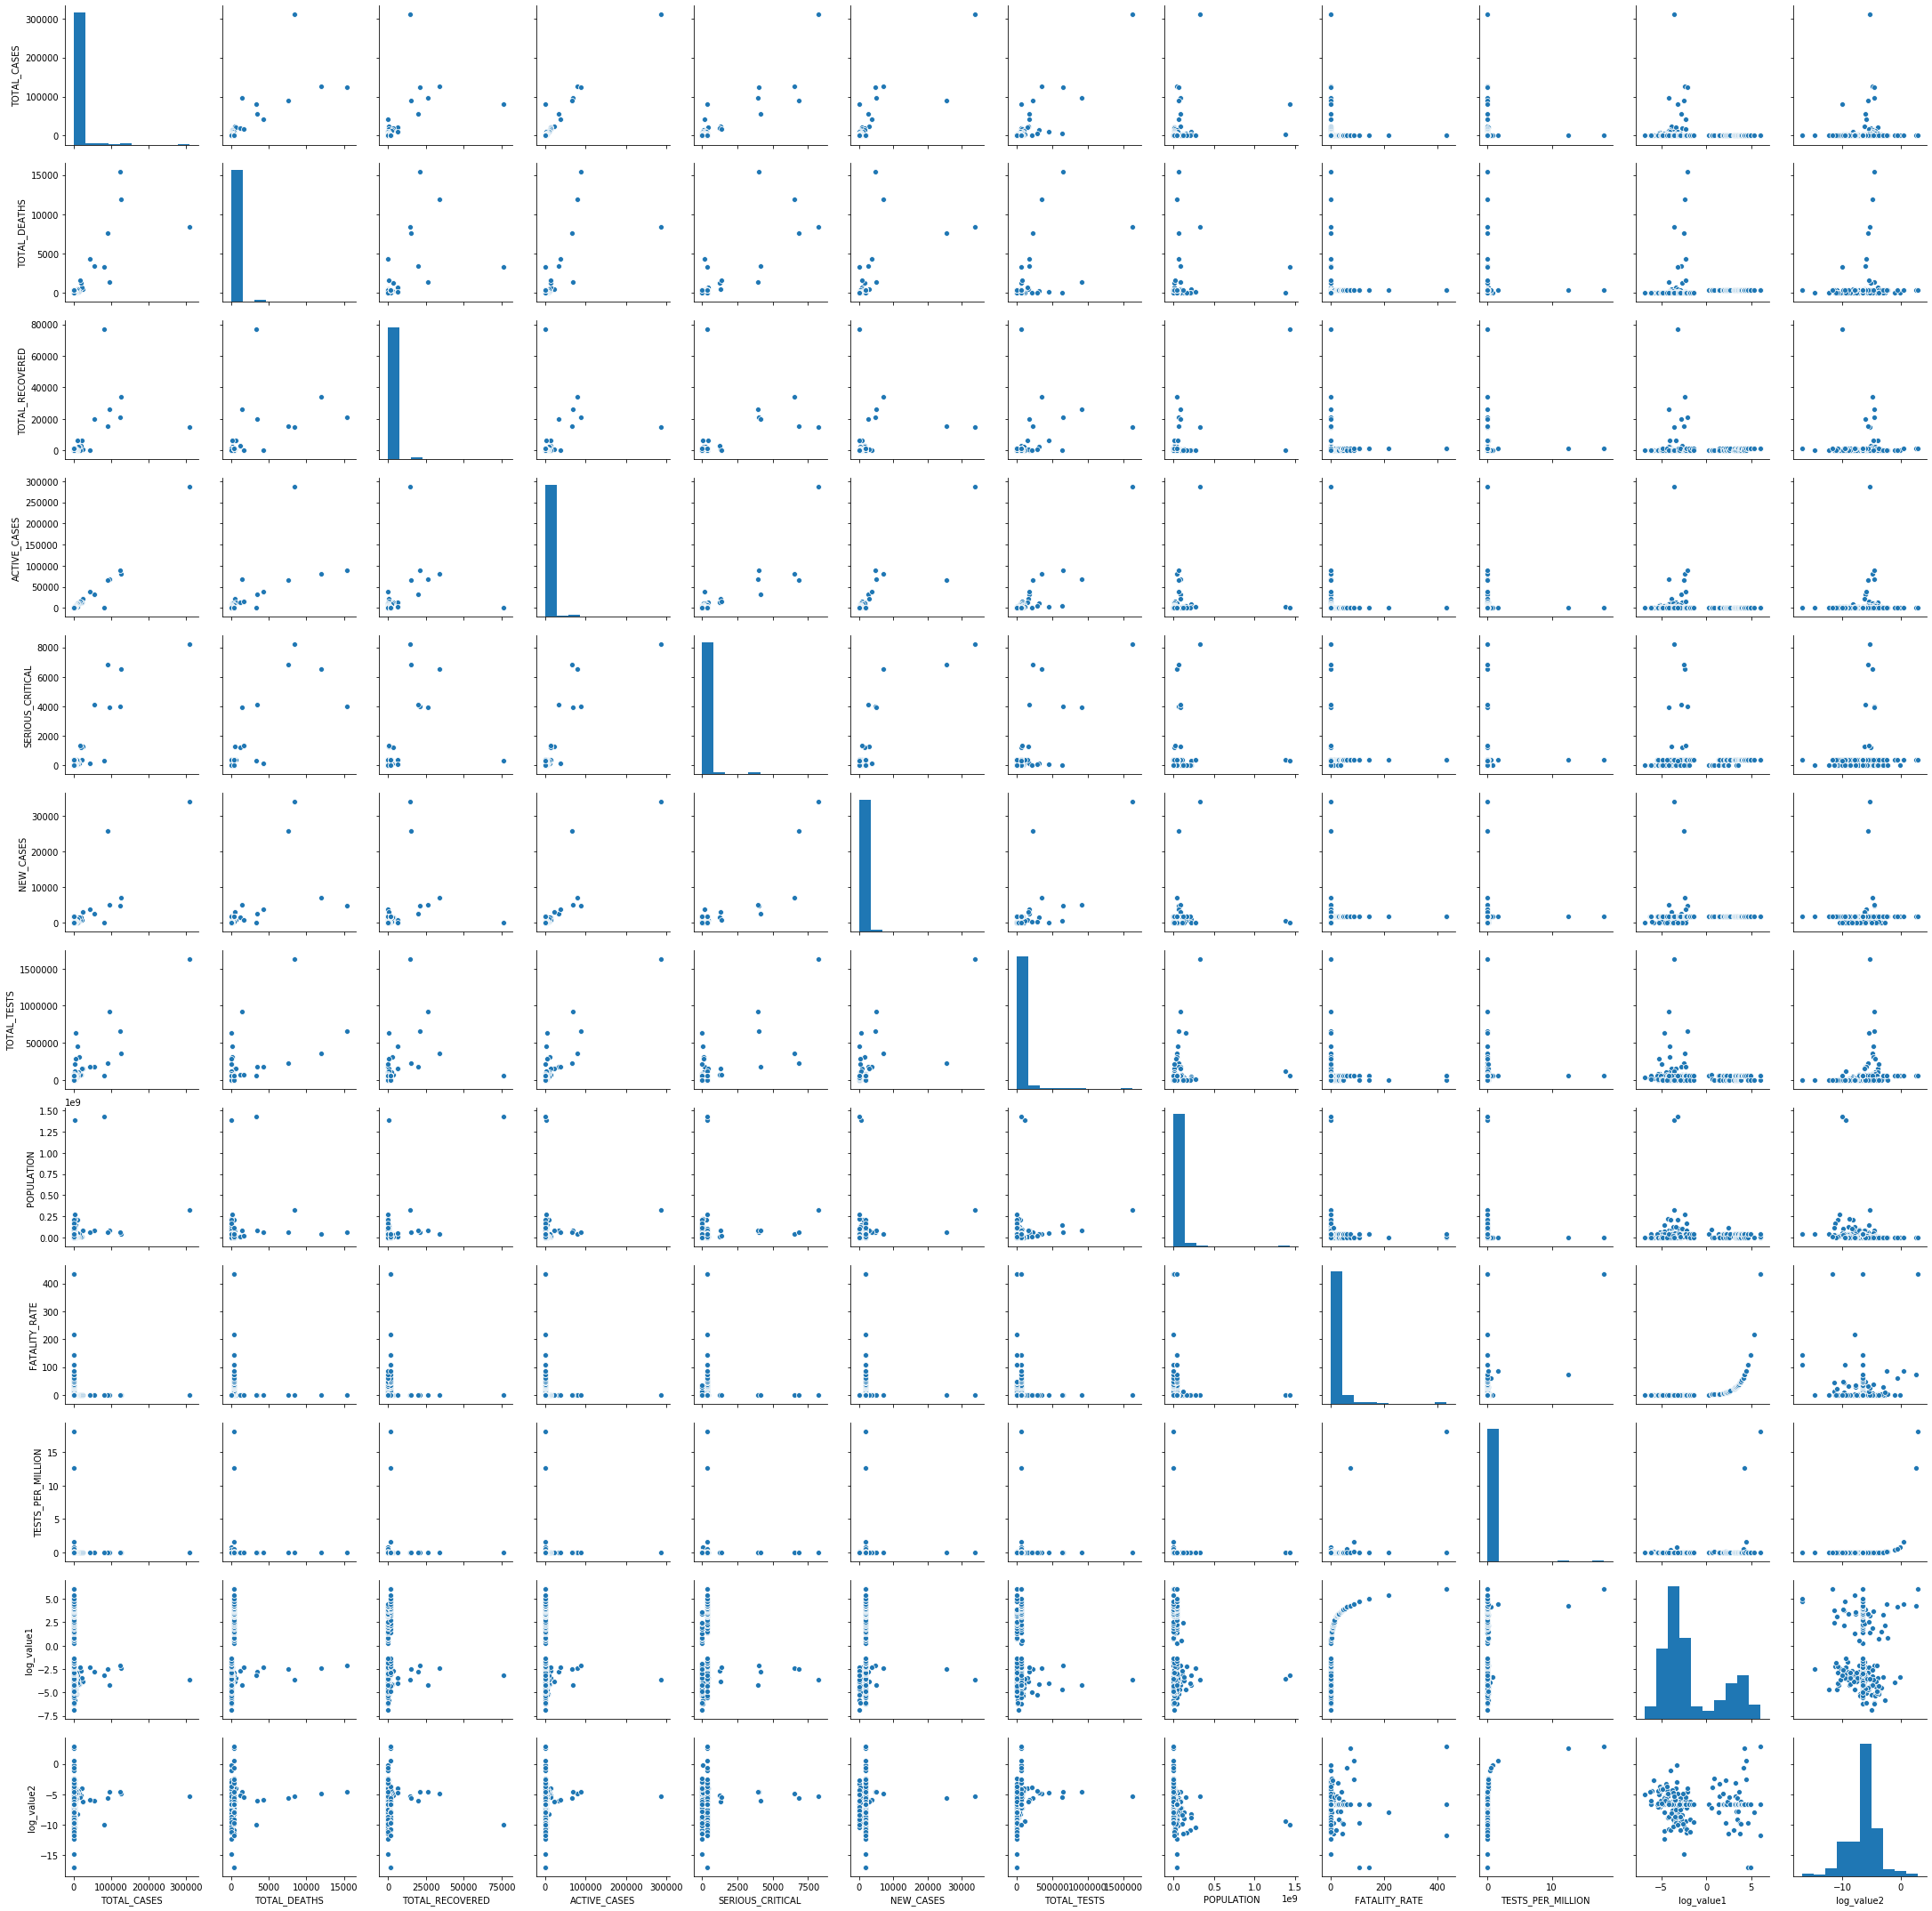

In [133]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(d)

In [134]:
d.head()

,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,TOTAL_TESTS,POPULATION,FATALITY_RATE,TESTS_PER_MILLION,log_value1,log_value2
0,309728,8441.0,14741.0,286546,8206.0,33907.0,1626287.0,330984275.0,0.027253,0.004913,-3.602594,-5.315771
1,126168,11947.0,34219.0,80002,6532.0,6969.0,355000.0,46753588.0,0.094691,0.007593,-2.357134,-4.880528
2,124632,15362.0,20996.0,88274,3994.0,4805.0,657224.0,60463330.0,0.123259,0.010870,-2.093468,-4.521767
3,96092,1444.0,26400.0,68248,3936.0,4933.0,918460.0,83785805.0,0.015027,0.010962,-4.197889,-4.513321
4,89953,7560.0,15438.0,66955,6838.0,25615.0,224254.0,65266006.0,0.084044,0.003436,-2.476416,-5.673447


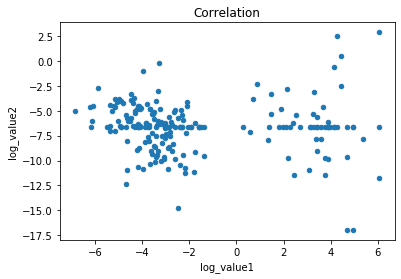

In [135]:
d.plot.scatter(x='log_value1', y='log_value2', title='Correlation')

In [137]:
#Question 5: tests per million and fatality rate have a positive relationship